# TIME SERIES ANALYSIS

# Goal: Find outliers, trends and periodicity in the MTA turnstile data
    

## DATA:
MTA subway fares. It is a complete dataset of
rides logged by card swipes for 600 Manhattan stations.

The data was organized  by Sina Kashuk at CUSP (he will teach the Geopanda lecture).
You can get it from the github repo (use the download link to download it live in your notebook). 
It contains 23 different subway card types 
(e.g. monthly pass, daily pass, Act for Disability pass…) as follows:


In [1]:
from IPython.display import Image


## Each time series (per station, per ticket type) contains the number of swipes per week for 194 weeks from 05/21/2010 to 02/21/2014. 

The data are available to you as a *python data cube*. you can load it as 

```
np.load(“MTA_Fare.npy")
```

and you will end up with a python numpy array of 
shape (600, 23, 194)

## note that the missing values are inputted as -1

if you want to do things like algebra (summing time series for example) you need to take care of that. If you replace the -1 entries with NaN, you may need to use functions that explicitly know how to deal with NaN: for example, to sum use the no.nansum etc
```
np.nanmean(mtarides)
np.nansum(mtarides)
```


as opposed to just 

use the no.nansum etc
```
np.mean(mtarides)
np.sum(mtarides)
```

## Task 1: 
### Event detection: Identify the most prominent event. There is a very significant drop (>3-sigma) in all time series.
### Identify it, figure out the date (you know when the data starts and what the cadence is) and figure out what it is due to.


## Task 2: 
### Some of the time series are stationary, some have a complex structure, some show a downward trend: Identify the **ridership types**  that have steadily increased in popularity,  and that have steadily decreased. by how much? (e.g what is the ratio of usage in the first 10 and last 10 weeks)


## Task 3:
### Several stations show a prominent annual periodicity. Identify the 4 **stations** (indentify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks). (Can you figure out what the periodic peak in rides is due to?)


## EXTRA CREDIT: Cluster. 
### Cluster the time series, i.e. identify groups of time series that look similar among each other. You can use KMeans for example to identify common trends, or PCA (Principle Component Analysis). 
### Since this is extra credit I will leave it to you to figure out the details, but for KMeans for e.g. if you use the sklearn.cluster package it would look something like:

#i am flattening the first 2 dimensions of the cube to cluster all light curves for all stations and all types

```
tots = data.transpose(2,0,1).reshape(data.shape[2], data.shape[1]*data.shape[0]).T
```

#removing empty light curves
```
tots = tots[tots.std(1)>0]
```

#with Kmeans you have to choose the number of clusters ahead km = 

```
KMeans(n_clusters=10)
```

#and standardize the lightcurves before clustering. Notice: standardize, not whiten! If you have done clustering before you may have whitened the data: removed the variance by "column", here you want to remove the variance by "row". We will discuss this in the clustering lecture. 
```
vals = ((tots.T - tots.mean(1))/tots.std(1)).T
```

#then you can run:

```
km.fit(vals)
```

In [185]:
import numpy as np
import pylab as pl
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import pylab as pl
import seaborn
import matplotlib.mlab as mlab
%pylab inline



Populating the interactive namespace from numpy and matplotlib


### Task 1: Event detection: Identify the most prominent event. There is a very significant drop (>3-sigma) in all time series. Identify it, figure out the date (you know when the data starts and what the cadence is) and figure out what it is due to.

In [193]:
mtaRides = np.load("MTA_Fare.npy")

In [194]:

mta_allsum = np.nansum(mtaRides, axis=0)

print mta_allsum


[[11494477 12526720 12766490 ..., 13189472 12500619 12459809]
 [  530386   583394   586057 ...,   694996   670091   679359]
 [   47663    51347    51499 ...,    58633    56388    55054]
 ..., 
 [    5990     5981     6353 ...,     5260     5622     6046]
 [     220      335      328 ...,      724      673      682]
 [    -600     -600     -600 ...,  1132585  1379266   534880]]


In [195]:
mta_data = pd.DataFrame(mta_allsum,index = ['10T', '14D', '1D', '2T', '30D', '7D', 'ADA', 'AFAS', 'EXP','EZ',
            'FF','MC','MR','Month','RFM','RR','SEN','SPEC','TCMC','T',
            'UMLIM','XBUS','SUTD'],columns= [np.arange(1,195)])
mta_data.head()

,1,2,3,4,5,6,7,8,9,10,...,185,186,187,188,189,190,191,192,193,194
10T,11494477,12526720,12766490,12653538,12809558,11429646,12346741,12576621,12436978,12431120,...,14603889,11344807,11223293,12864727,12904674,11932832,13139222,13189472,12500619,12459809
14D,530386,583394,586057,562465,548722,455554,518051,513274,512055,522432,...,781390,596203,518819,664393,744853,613156,713579,694996,670091,679359
1D,47663,51347,51499,51926,51017,46715,48827,49491,48893,50239,...,62519,50682,45016,55991,60292,51526,57070,58633,56388,55054
2T,186413,199090,199531,196252,194747,175511,188331,187952,186685,190391,...,193129,164469,148515,177747,193410,168794,189426,184101,179892,179225
30D,46670,64214,56857,37292,35074,46712,60089,47301,31947,52034,...,56532,22485,25164,67575,64730,43288,47666,60963,59263,46721


In [196]:
mta_data[(mta_data> 0).all(1)]


,1,2,3,4,5,6,7,8,9,10,...,185,186,187,188,189,190,191,192,193,194
10T,11494477,12526720,12766490,12653538,12809558,11429646,12346741,12576621,12436978,12431120,...,14603889,11344807,11223293,12864727,12904674,11932832,13139222,13189472,12500619,12459809
14D,530386,583394,586057,562465,548722,455554,518051,513274,512055,522432,...,781390,596203,518819,664393,744853,613156,713579,694996,670091,679359
1D,47663,51347,51499,51926,51017,46715,48827,49491,48893,50239,...,62519,50682,45016,55991,60292,51526,57070,58633,56388,55054
2T,186413,199090,199531,196252,194747,175511,188331,187952,186685,190391,...,193129,164469,148515,177747,193410,168794,189426,184101,179892,179225
30D,46670,64214,56857,37292,35074,46712,60089,47301,31947,52034,...,56532,22485,25164,67575,64730,43288,47666,60963,59263,46721
7D,3697305,3981669,4032893,4032616,3925310,3663007,3917968,4028113,4030580,4032203,...,6388399,5230427,5332788,5260264,5427037,4969929,5511475,5599099,5551155,5404939
ADA,8551799,9486255,9476401,9449944,9293866,8286666,9271277,9306437,9145715,8905980,...,8482190,5824106,5891582,8264448,8838661,8250219,9446500,9309121,9030458,8705012
MC,119743,143430,136246,134281,136215,112815,135437,132494,133517,133347,...,186555,106190,110108,178594,176384,158628,180780,180881,168813,152224
Month,122996,151809,151401,146957,137752,111288,140796,137937,136092,134564,...,95191,42904,44143,97844,97660,73855,97690,87170,82596,74134
RFM,789972,907929,913987,902412,855437,730394,838494,845089,832098,823099,...,609023,385597,404016,581553,604588,541125,606968,606051,590712,551868


In [198]:
mta_data = mta_data.transpose()

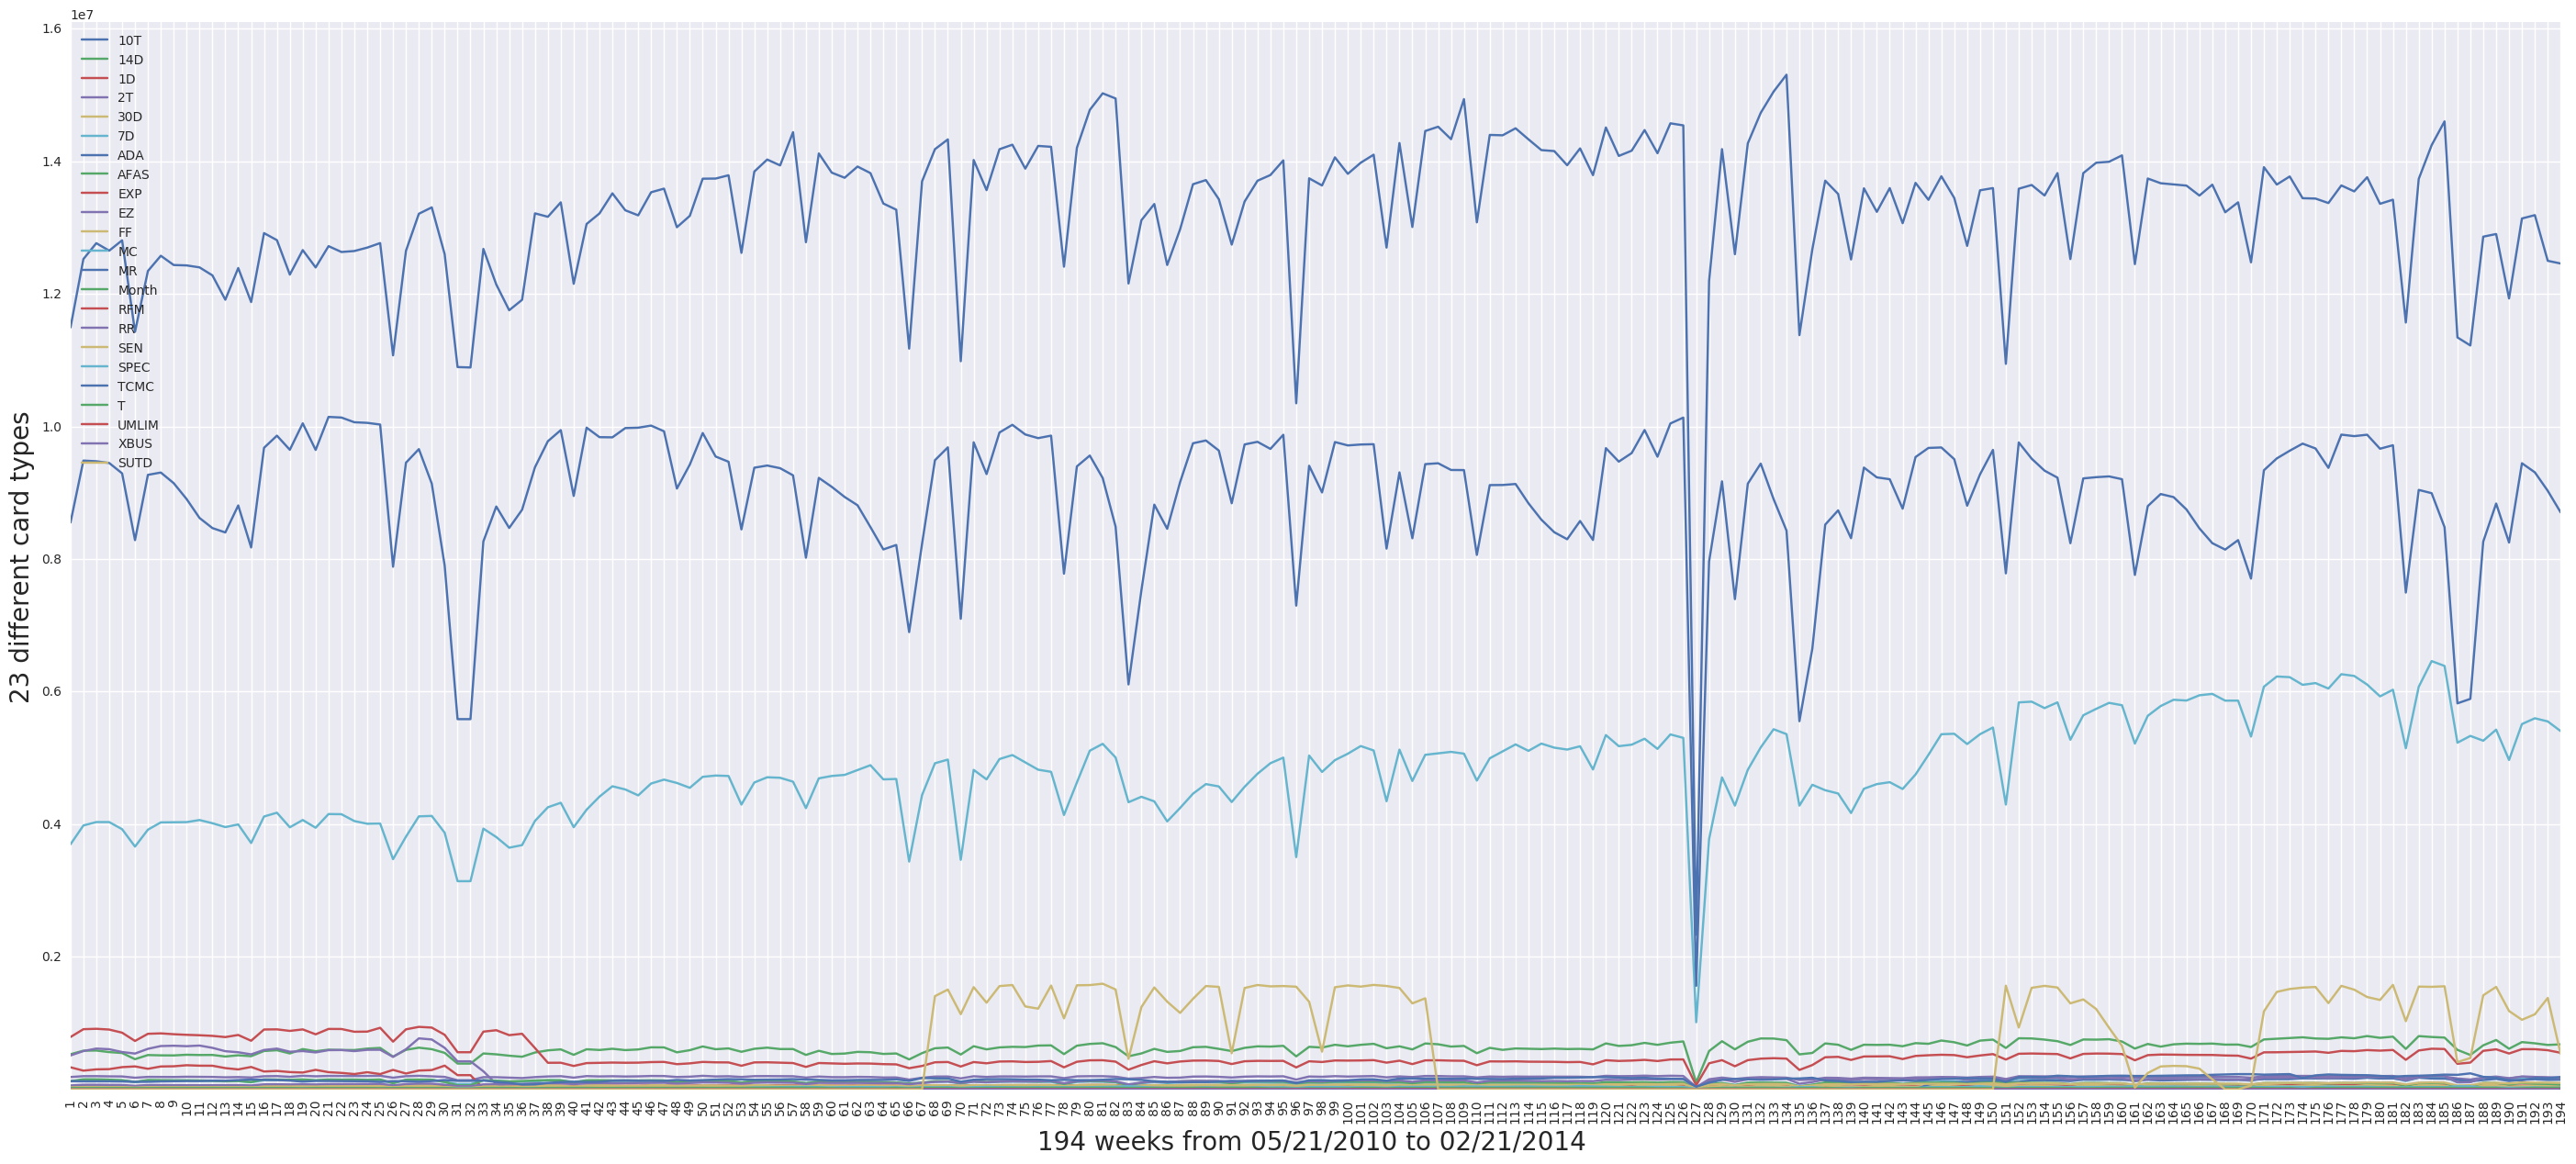

In [280]:
mta_data.plot(figsize = (35,15))
index = np.arange(1,195,1)
pl.xticks(index, rotation = 90)
pl.xlabel('194 weeks from 05/21/2010 to 02/21/2014 ', fontsize = 20)
pl.ylabel('23 different card types', fontsize = 20)
pl.ylim(9,1.61e7)
pl.legend(loc = 'upper left', fontsize= 10)

### This figure shows the time series of 23 different card types from 05/21/2010 to 02/21/201.

In [93]:
import time
atime = time.asctime(time.strptime('{} {} 1'.format(2012, 43), '%Y %W %w'))
atime

'Mon Oct 22 00:00:00 2012'

### From the plot we can see that from the week 126, there was a significant drop in all time series.
### And the date started from around 10/26/2012, the reason of such a drop may be the Hurricane Sandy -- Possible East Coast 'Frankenstorm'. 

### Task 2: Some of the time series are stationary, some have a complex structure, some show a downward trend: Identify the ridership types that have steadily increased in popularity, and that have steadily decreased. by how much? (e.g what is the ratio of usage in the first 10 and last 10 weeks)

In [265]:
data1 = mta_data

data1.head()

,10T,14D,1D,2T,30D,7D,ADA,AFAS,EXP,EZ,...,Month,RFM,RR,SEN,SPEC,TCMC,T,UMLIM,XBUS,SUTD
1,11494477,530386,47663,186413,46670,3697305,8551799,9925,333059,511894,...,122996,789972,59671,28083,-138,124555,20922,5990,220,-600
2,12526720,583394,51347,199090,64214,3981669,9486255,11708,282616,577884,...,151809,907929,69070,32194,-139,121574,21531,5981,335,-600
3,12766490,586057,51499,199531,56857,4032893,9476401,12140,301891,615400,...,151401,913987,69437,32481,-137,122044,21296,6353,328,-600
4,12653538,562465,51926,196252,37292,4032616,9449944,11084,305376,606133,...,146957,902412,67962,32267,-137,121914,21493,6453,347,-600
5,12809558,548722,51017,194747,35074,3925310,9293866,10379,335644,563310,...,137752,855437,66241,31797,40,119640,20161,6177,316,-600


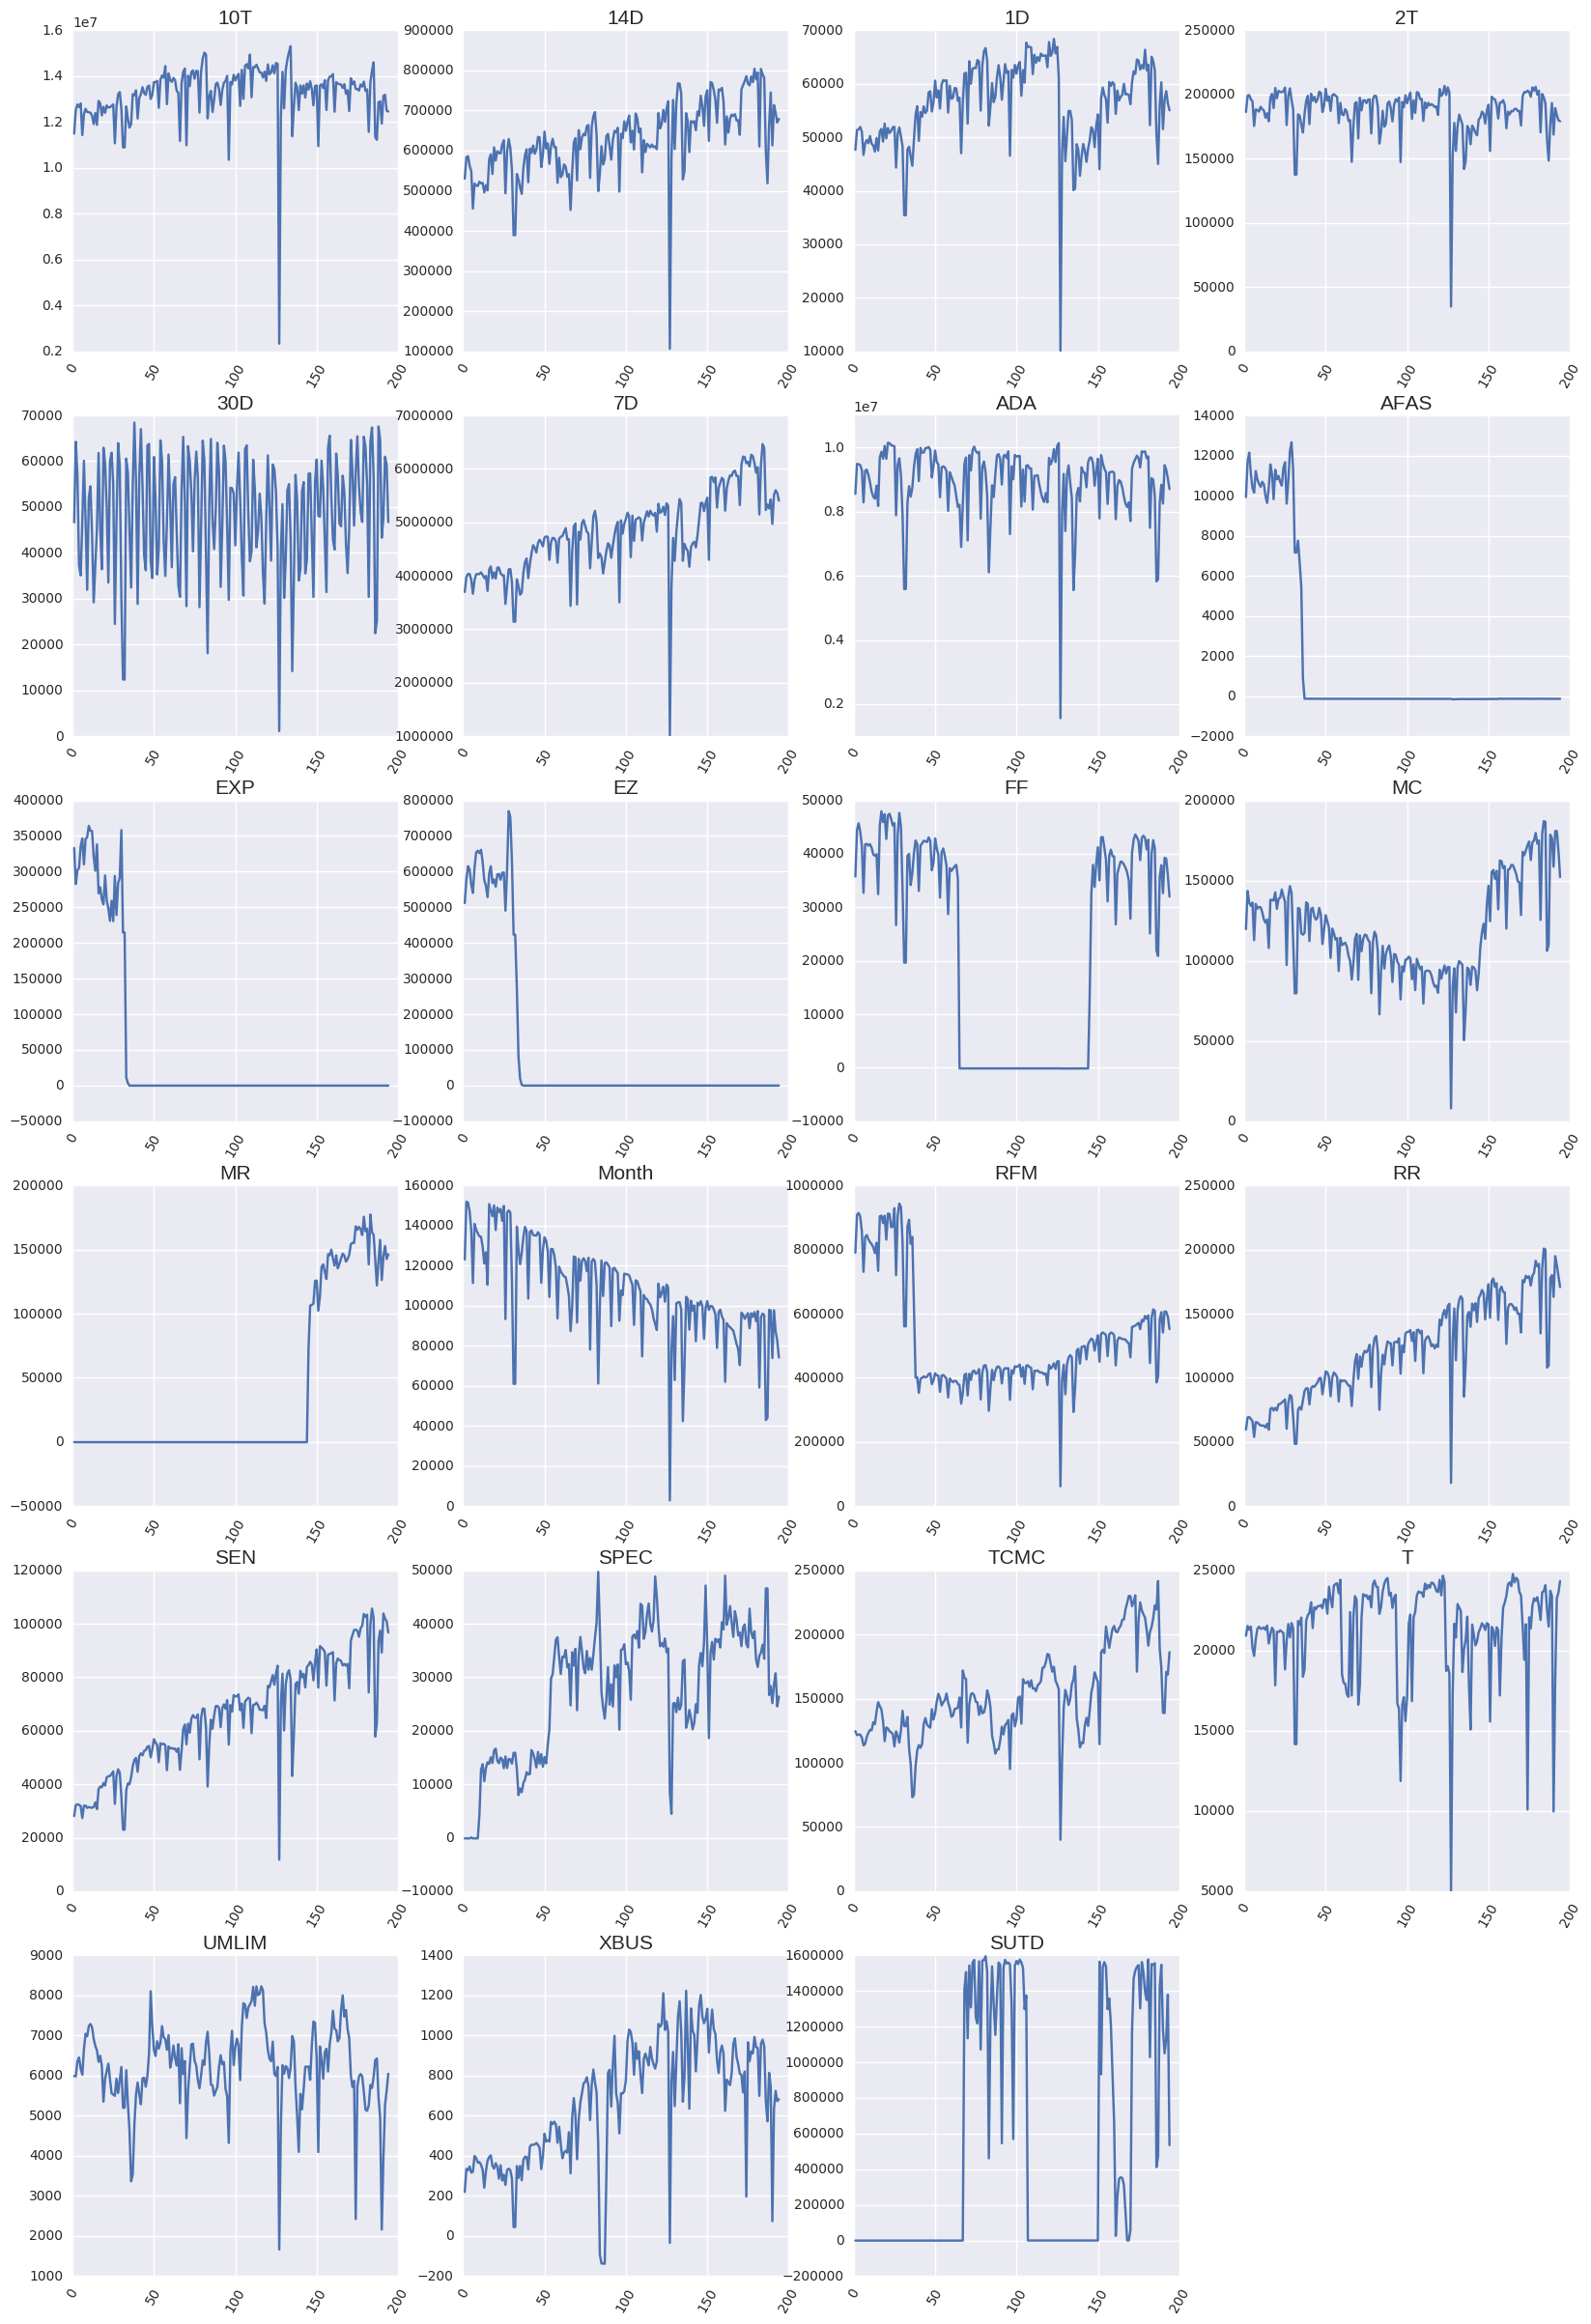

In [272]:
ridetype = ['10T', '14D', '1D', '2T', '30D', '7D', 'ADA', 'AFAS', 'EXP','EZ',
            'FF','MC','MR','Month','RFM','RR','SEN','SPEC','TCMC','T',
            'UMLIM','XBUS','SUTD']
plt.figure(figsize=(20,30))
for i in range(0,len(ridetype)):
    plt.subplot(6,4,i+1)
    plt.plot(data1.iloc[:,i])
    plt.xticks(rotation=60, size=10)
    plt.title(ridetype[i], size=15)

### These figures show each card types' time series for 600 stations. But they do not show obvious trends so let's use pd.rolling_mean to figure out it.


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()


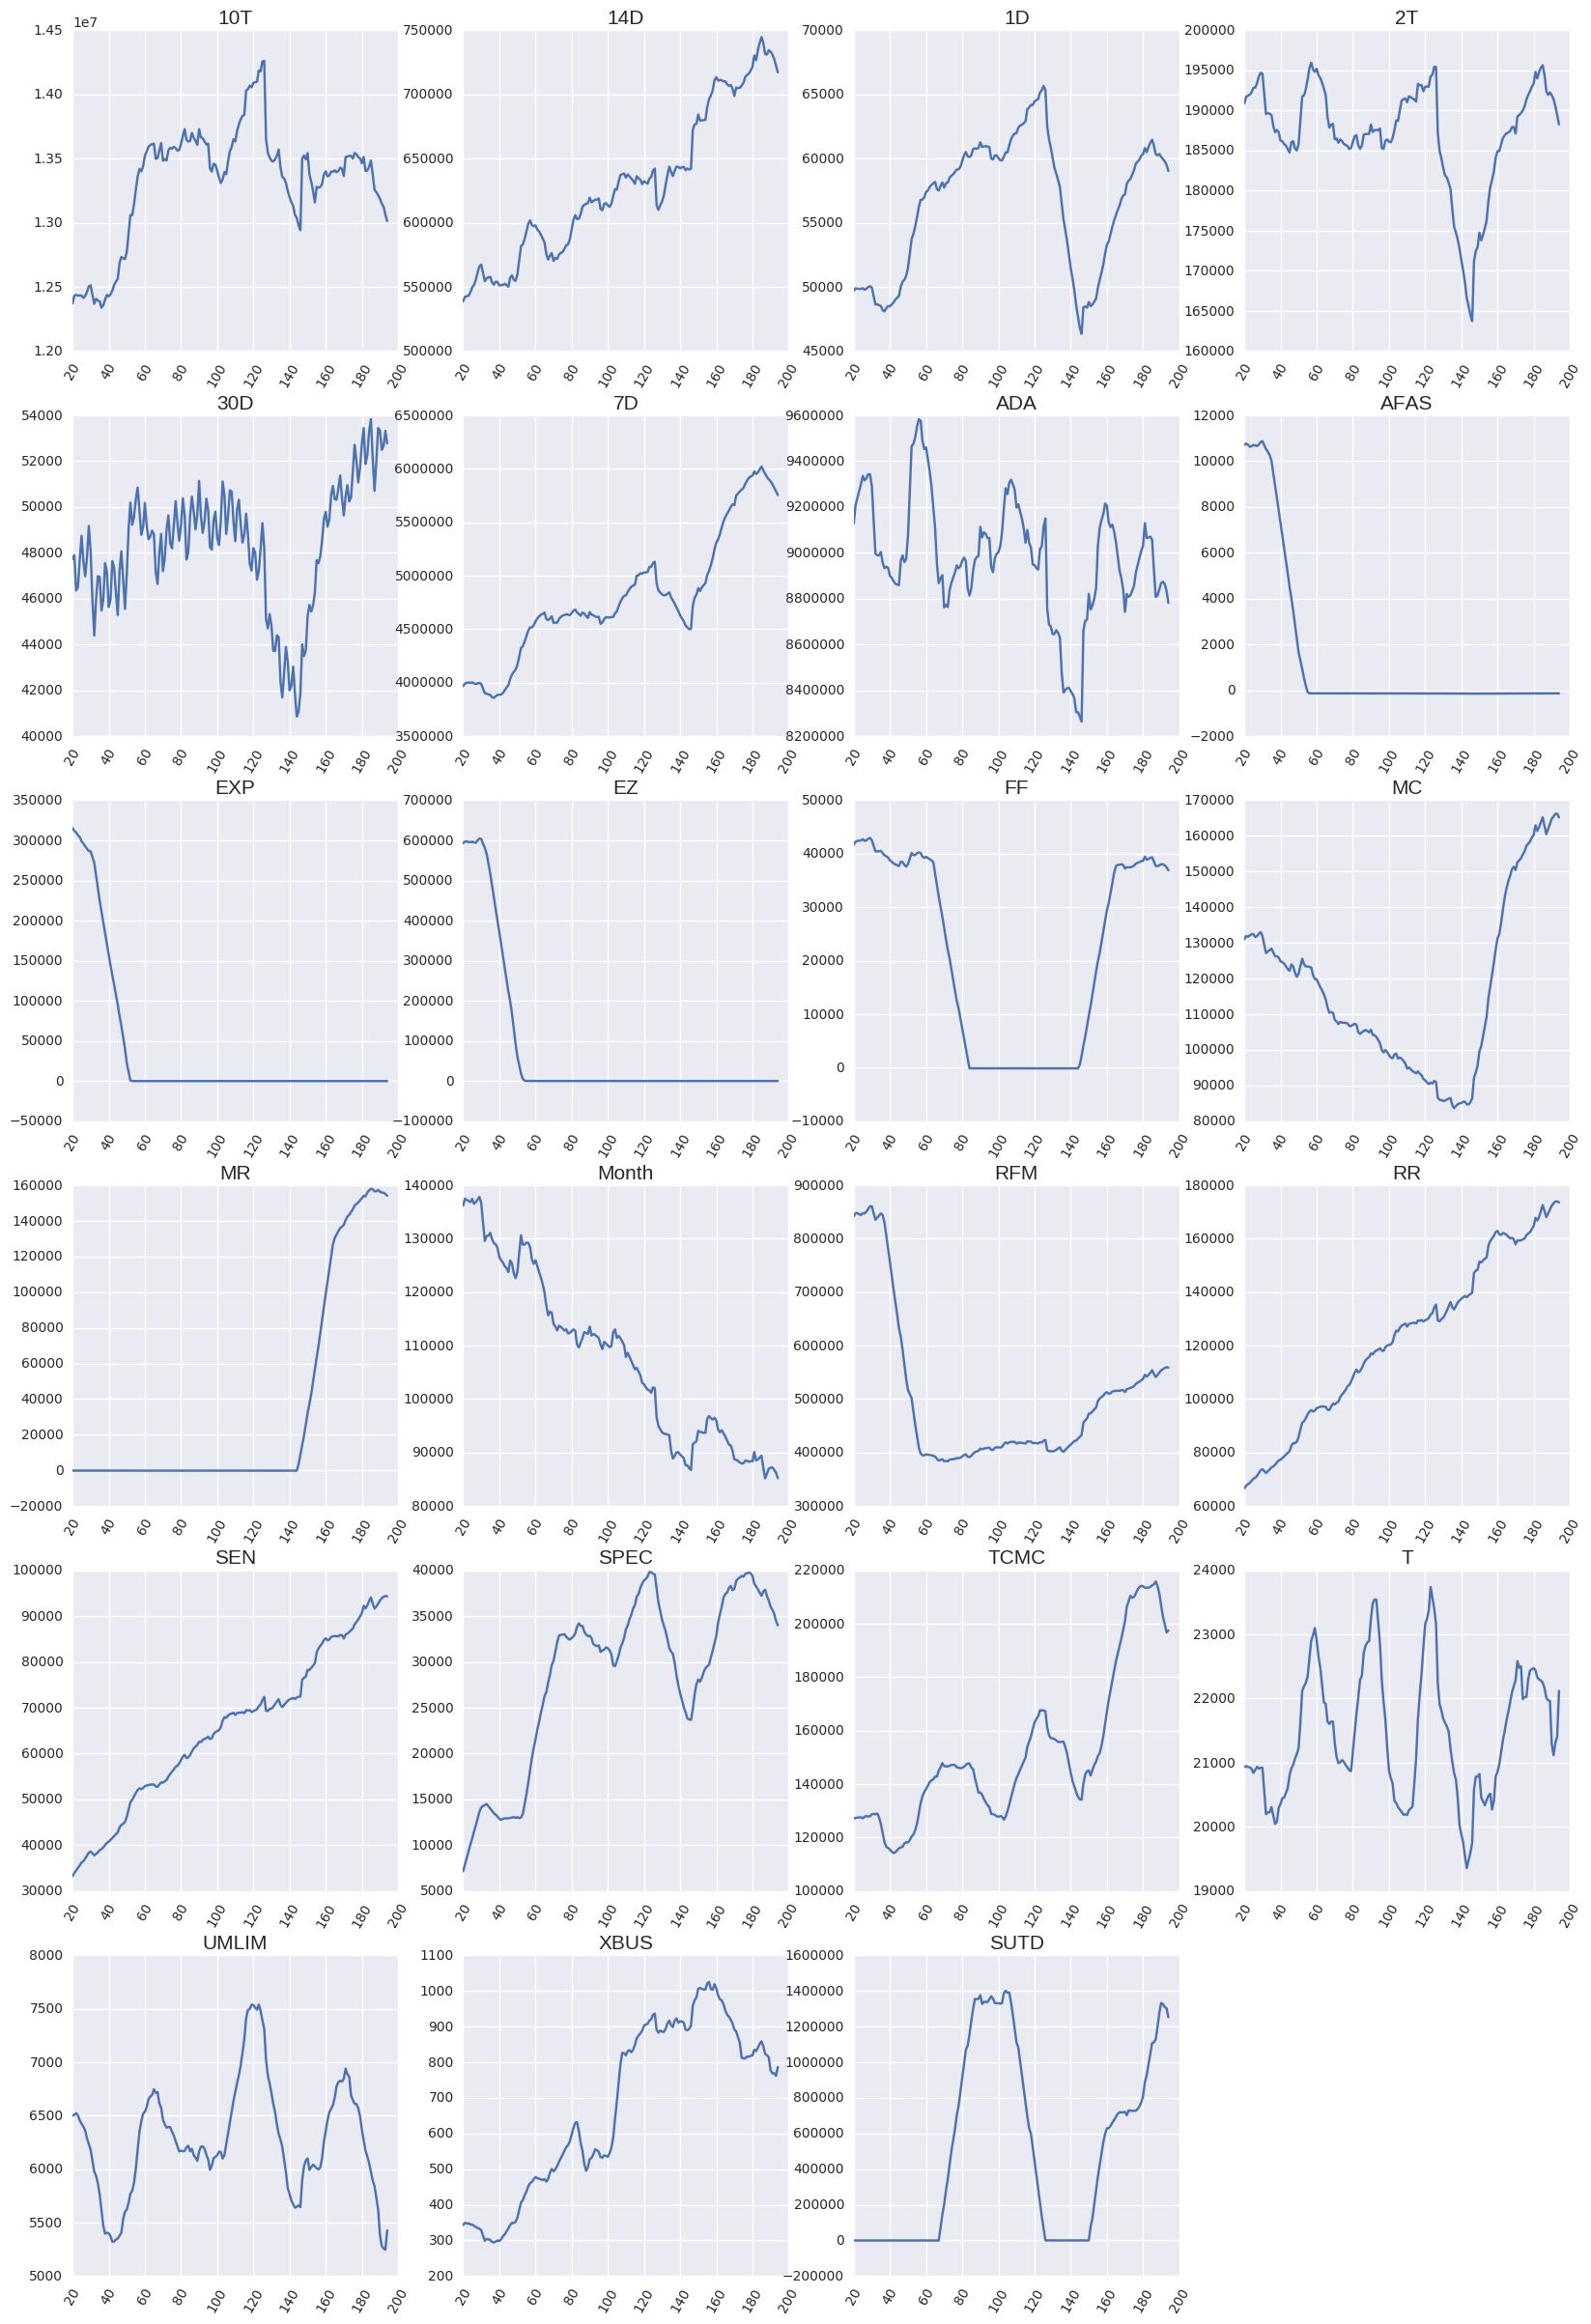

In [276]:
plt.figure(figsize=(20,30))
for i in range(0,len(ridetype)):
    plt.subplot(6,4,i+1)
    plt.plot(pd.rolling_mean(data1.iloc[:,i], 20))
    plt.xticks(rotation=60, size=10)
    plt.title(ridetype[i], size=15)


### In these figures, after smoothing, some card types show obvious increased or decreased patterns.
### Increased: 14D, 7D, RR, Sen, TCMC,XBUS
### Decreased: Month

In [310]:
for i in range(0,len(ridetype)):
    ratio = np.mean(data1.iloc[:10,i])/np.mean(data1.iloc[-10:,i])
    print 'The trend ratio of cardtype %s is %s.' % (ridetype[i], ratio)
   

The trend ratio of cardtype 10T is 0.978666901854.
The trend ratio of cardtype 14D is 0.798639895316.
The trend ratio of cardtype 1D is 0.89957174183.
The trend ratio of cardtype 2T is 1.07094756419.
The trend ratio of cardtype 30D is 0.967238216215.
The trend ratio of cardtype 7D is 0.719548158964.
The trend ratio of cardtype ADA is 1.11130896299.
The trend ratio of cardtype AFAS is -80.0302583026.
The trend ratio of cardtype EXP is -2437.5465376.
The trend ratio of cardtype EZ is -4376.05186267.
The trend ratio of cardtype FF is 1.22222057084.
The trend ratio of cardtype MC is 0.823887210574.
The trend ratio of cardtype MR is -0.000914947484521.
The trend ratio of cardtype Month is 1.7292164395.
The trend ratio of cardtype RFM is 1.53952557885.
The trend ratio of cardtype RR is 0.385156769744.
The trend ratio of cardtype SEN is 0.34272295291.
The trend ratio of cardtype SPEC is 0.00998581560284.
The trend ratio of cardtype TCMC is 0.652370613023.
The trend ratio of cardtype T is 0.97

### For those who have obvious trends, the ratio are:
14D: 0.798639895316.

7D: 0.719548158964.

Month:1.7292164395.

RR: 0.385156769744.

SEN: 0.34272295291.

TCMC: 0.652370613023.

XBUS:0.518507188743.


### Task 3: Several stations show a prominent annual periodicity. Identify the 4 stations (indentify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks). (Can you figure out what the periodic peak in rides is due to?)

In [250]:
mta_allsum1 = np.nansum(mtaRides, axis=1)

print mta_allsum1.shape

(600, 194)


In [252]:
mta_data1 = pd.DataFrame(mta_allsum1,index = np.arange(1,601),columns= [np.arange(1,195)])
mta_data1.head()

,1,2,3,4,5,6,7,8,9,10,...,185,186,187,188,189,190,191,192,193,194
1,126877,149476,152382,160174,162640,156413,159155,159373,163284,159251,...,87973,83825,91001,80908,79891,69881,79550,78901,74591,76833
2,37305,46463,49358,44848,41508,35653,41988,41908,41213,41141,...,-23,-23,-23,-23,-23,-23,-23,-23,-23,-23
3,6605,6880,7228,5730,7031,5106,5496,5667,5554,6941,...,8268,5928,5656,7665,8377,7343,7743,8171,7907,6790
4,16377,17407,17594,14241,17588,13167,14509,14387,14220,17179,...,23450,16228,15586,21806,23534,20604,21370,22459,22773,19033
5,18563,19902,19947,16075,20282,14600,16150,16065,16204,19618,...,23025,18253,17293,21484,22516,20560,21942,23283,22987,21562


In [255]:
mta_data1[(mta_data1> 0).all(1)]
mta_data1 = mta_data1.transpose()

In [298]:
mta_allsum1 = np.nansum(mtaRides, axis=1)
mta_allsum1.shape

(600, 194)

In [297]:
N = len(mta_allsum1[0])
print N

194


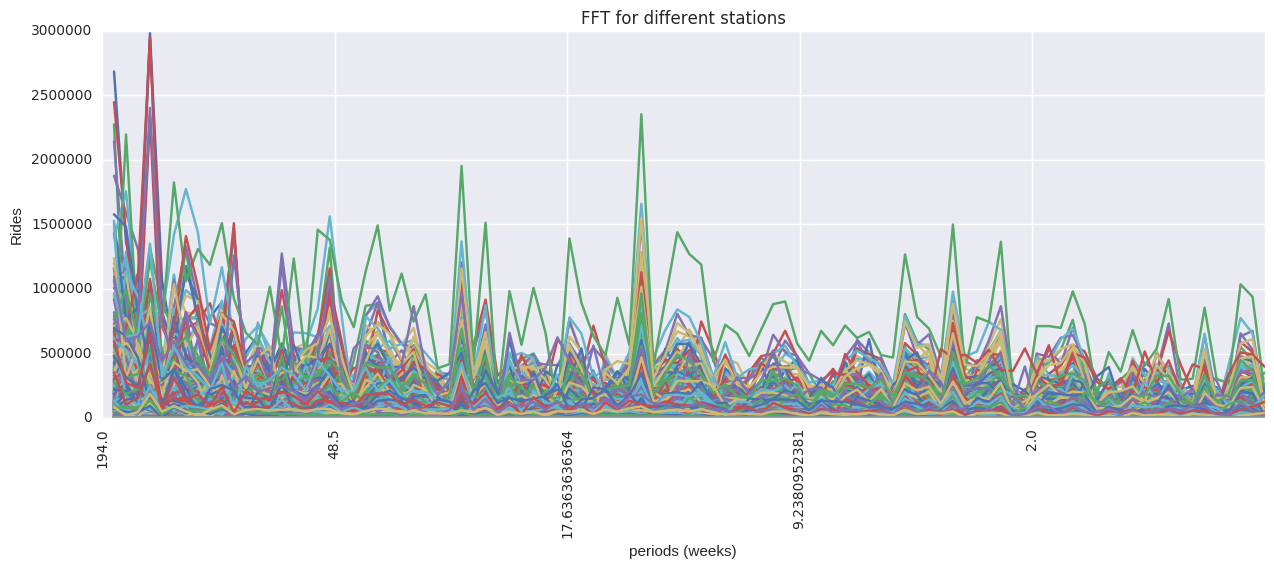

In [308]:
fig=plt.figure(figsize=(15,5))
peak = []
for i in range(len(mta_allsum1)):
    f = np.abs(np.fft.rfft(mta_allsum1[i,:]))[1:]
    ax=fig.add_subplot(111)
    periods = np.fft.rfftfreq(mta_allsum1[i,:].shape[0], 1)[1:]
    peak.append(f[3])
    ax.plot(periods, f)
allperiods = periods[[0, 3, 10, 20, -1]]
ax.set_xticklabels(['%s'%(1/f) for f in allperiods], rotation=90)
ax.set_xlabel('periods (weeks)')
ax.set_ylabel('Rides')
ax.set_title('FFT for different stations')

### This figure shows time series fft result for 600 stations periods.

In [301]:
peak = np.array(peak)
sort = np.argsort(peak)[::-1] #sort the peak value 


In [307]:
mvalue = np.where(~np.isnan(peak[sort]))[0]
stations = sort[mvalue][:4]
print 'The four stations are :', stations

The four stations are : [  0 194 150 327]


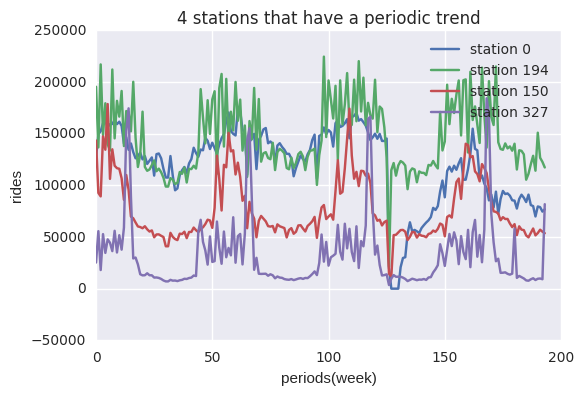

In [306]:
for i in stations:
    plt.plot(mta_allsum1[i], label = 'station '+str(i))
plt.title('4 stations that have a periodic trend')
plt.ylabel('rides')
plt.xlabel('periods(week)')
plt.legend(loc = 'best')

### This figure shows the most prominent periodic trend for 4 stations on an annual period.

### EXTRA CREDIT: Cluster. Cluster the time series, i.e. identify groups of time series that look similar among each other. You can use KMeans for example to identify common trends, or PCA (Principle Component Analysis).
Since this is extra credit I will leave it to you to figure out the details, but for KMeans for e.g. if you use the sklearn.cluster package it would look something like:
#i am flattening the first 2 dimensions of the cube to cluster all light curves for all stations and all types
tots = data.transpose(2,0,1).reshape(data.shape[2], data.shape[1]*data.shape[0]).T
#removing empty light curves
tots = tots[tots.std(1)>0]
#with Kmeans you have to choose the number of clusters ahead km =
KMeans(n_clusters=10)
#and standardize the lightcurves before clustering. Notice: standardize, not whiten! If you have done clustering before you may have whitened the data: removed the variance by "column", here you want to remove the variance by "row". We will discuss this in the clustering lecture.
vals = ((tots.T - tots.mean(1))/tots.std(1)).T
#then you can run:
km.fit(vals)

In [315]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist

In [311]:
tots = mtaRides.transpose(2,0,1).reshape(mtaRides.shape[2], mtaRides.shape[1]*mtaRides.shape[0]).T

In [312]:
tots = tots[tots.std(1)>0]

In [313]:
KMeans(n_clusters=10)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=10, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [316]:
vals = ((tots.T - tots.mean(1))/tots.std(1)).T


In [317]:
def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained')
    plt.title('Elbow for KMeans clustering')
    plt.show()

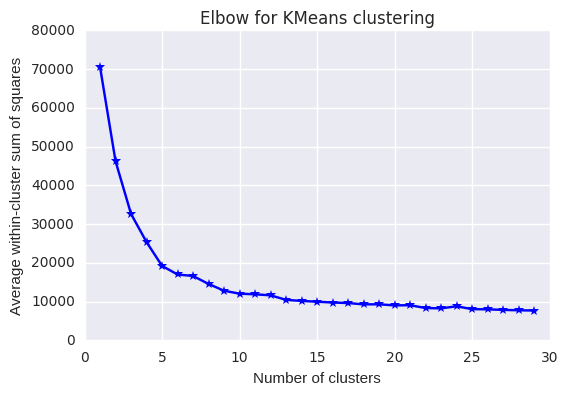

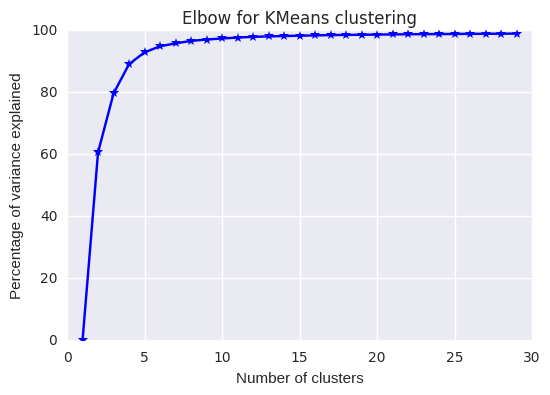

In [318]:

elbow(tots, range(1,30))

### So according to the elbow method we can know that the number of clusters is 5.